In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics.cluster import contingency_matrix
from scipy.stats import entropy
import math

# Carregue os dados do arquivo CSV com cabeçalho
df = pd.read_csv('Base5.csv')

display(df)

# Crie as variáveis p0 e p1 com base na coluna 'label'
p0 = df[df['label'] == 0]
p1 = df[df['label'] == 1]


print("Análise Descritiva dos dados")
print("P0: ", len(p0))
print("P1: ", len(p1))

# Calcular o desvio padrão para as classes 0 e 1 nas colunas 'x' e 'y'
std_p0_x = p0['x'].std()
std_p0_y = p0['y'].std()

std_p1_x = p1['x'].std()
std_p1_y = p1['y'].std()

print("\n")

print("Desvio Padrão Classe 0 em (x):", std_p0_x)
print("Desvio Padrão Classe 0 em (y):", std_p0_y)

print("Desvio Padrão Classe 1 em (x):", std_p1_x)
print("Desvio Padrão Classe 1 em (y):", std_p1_y)

# Calcular o ponto médio para a classe 0
p0_xM = p0['x'].mean()
p0_yM = p0['y'].mean()

# Calcular o ponto médio para a classe 1
p1_xM = p1['x'].mean()
p1_yM = p1['y'].mean()

print("\n")

print("Ponto Médio Classe 0 (x):", p0_xM)
print("Ponto Médio Classe 0 (y):", p0_yM)

print("Ponto Médio Classe 1 (x):", p1_xM)
print("Ponto Médio Classe 1 (y):", p1_yM)




,x,y,label
0,-8.806930,7.248033,0
1,-10.450622,5.293447,0
2,-0.833457,3.721687,1
3,-7.800044,5.891239,0
4,-6.628308,7.540552,0
...,...,...,...
1995,-2.915128,5.236034,1
1996,-0.136114,3.775187,1
1997,-7.934534,7.192954,0
1998,-5.343402,1.998966,0


Análise Descritiva dos dados
P0:  1000
P1:  1000


Desvio Padrão Classe 0 em (x): 1.5856666420790513
Desvio Padrão Classe 0 em (y): 1.5740545313902738
Desvio Padrão Classe 1 em (x): 1.5830495993869969
Desvio Padrão Classe 1 em (y): 1.590703145099291


Ponto Médio Classe 0 (x): -8.47104275142981
Ponto Médio Classe 0 (y): 5.476883540602863
Ponto Médio Classe 1 (x): -1.2526423890509515
Ponto Médio Classe 1 (y): 4.495774234215612


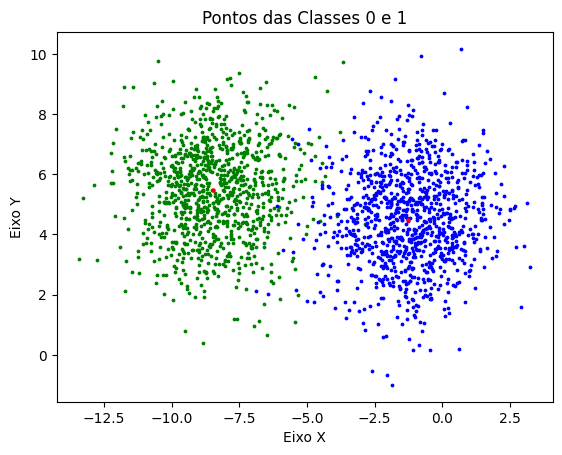

In [19]:
# Extraia as coordenadas x e y das classes p0 e p1
p0_x = p0['x']
p0_y = p0['y']

p1_x = p1['x']
p1_y = p1['y']

# Plote os pontos das classes p0 e p1
plt.scatter(p0_x, p0_y, label='Classe 0', s=3, c='green')
plt.scatter(p1_x, p1_y, label='Classe 1', s=3, c='blue')

# Plote os centros de massa com pontos menores
plt.scatter(p0_xM, p0_yM, label='Centro 0', s=5, c='red')
plt.scatter(p1_xM, p1_yM, label='Centro 1', s=5, c='red')


# Defina os rótulos dos eixos e o título do gráfico
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Pontos das Classes 0 e 1')

# Adicione uma legenda e ajuste sua posição
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))



plt.savefig('Graficos/PlotOriginal.png', dpi = 500)
# Exiba o gráfico
plt.show()

In [20]:
def plotagraficos (opiniao,modelo):
  f,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(15,5))
  ax1.set_title(label=modelo)
  ax1.scatter(df['x'],df['y'],c=opiniao,cmap="rainbow")
  ax2.set_title("Original")
  ax2.scatter(df['x'],df['y'],c=df['label'],cmap="rainbow")



Soma dos quadrados das distâncias até o centróide mais próximo:  36552.28015997853

Coesão:  191.18650621834828


c:\Users\Bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

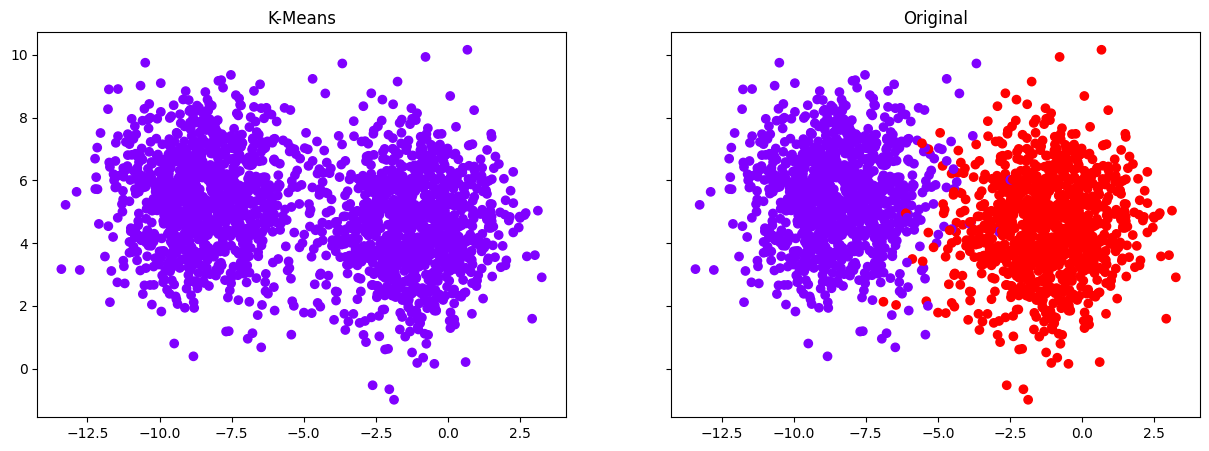

In [22]:
clusters = [1, 2, 3, 4]
iter = [100,200,300,400 ]

for i in (clusters):
  for j in iter:
    kmeans = KMeans(n_clusters=i, max_iter=j,random_state=15)
    DadosTreino = pd.DataFrame(df,columns=df.columns[:-1])
    kmeans.fit(DadosTreino)
    X = kmeans.labels_
    
    plotagraficos(X,'K-Means')
    print("\nSoma dos quadrados das distâncias até o centróide mais próximo: ",kmeans.inertia_)
    print("\nCoesão: ",math.sqrt(kmeans.inertia_)/kmeans.n_clusters)
    print("\nCoeficiente de Silhueta: ",metrics.silhouette_score(DadosTreino,kmeans.labels_))
    print("\nRand Score K-means: ",metrics.rand_score(df['label'],kmeans.labels_))
    print("\nHomogeneidade : ",metrics.homogeneity_score(df['label'],kmeans.labels_))
    print("\nCompletude : ",metrics.completeness_score(df['label'],kmeans.labels_))
    print("\nMatriz de contingência kmeans\n", contingency_matrix(df['label'], kmeans.labels_))


